In [ ]:
import pandas as pd
import os
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.metrics import calinski_harabasz_score
from sklearn.mixture import GaussianMixture


In [7]:

# List of filenames
files = [
    'E:/roz/depth20_1000ms/BNBFDUSD_20250314.txt',
    'E:/roz/depth20_1000ms/BNBFDUSD_20250315.txt',
    'E:/roz/depth20_1000ms/BNBFDUSD_20250316.txt',
    'E:/roz/depth20_1000ms/BNBFDUSD_20250317.txt'
]

# Initialize an empty list to store DataFrames
depth20_list = []

# Read each file and append to the list
for file in files:
    df = pd.read_csv(file)
    # Optionally, add a new column for the date to differentiate the data
    # df['Date'] = os.path.basename(file).split('_')[1].split('.')[0]  # Extract date from filename
    depth20_list.append(df)

# Concatenate all DataFrames into one
depth20_combined = pd.concat(depth20_list, ignore_index=True)

# Check the combined DataFrame
print(depth20_combined.head())
  # Example file, adjust based on your actual data
depth20_combined

                                      Time  BidPriceL20  BidQtyL20  \
0  2025-03-14 00:00:02.292522546 +0530 IST       579.20      0.621   
1  2025-03-14 00:00:03.292828523 +0530 IST       579.08      2.612   
2  2025-03-14 00:00:04.292889586 +0530 IST       579.14      1.948   
3  2025-03-14 00:00:05.292551566 +0530 IST       579.07      0.013   
4  2025-03-14 00:00:06.292725093 +0530 IST       579.11      9.143   

   BidPriceL19  BidQtyL19  BidPriceL18  BidQtyL18  BidPriceL17  BidQtyL17  \
0       579.24      0.015       579.25      0.009       579.26      0.013   
1       579.09      8.606       579.10      3.453       579.11      3.825   
2       579.15      3.957       579.18      1.681       579.19      3.465   
3       579.08      0.013       579.09      8.606       579.10      3.453   
4       579.12      6.361       579.13      5.837       579.14      2.816   

   BidPriceL16  ...  AskPriceL16  AskQtyL16  AskPriceL17  AskQtyL17  \
0       579.27  ...       579.67      1.151  

,Time,BidPriceL20,BidQtyL20,BidPriceL19,BidQtyL19,BidPriceL18,BidQtyL18,BidPriceL17,BidQtyL17,BidPriceL16,...,AskPriceL16,AskQtyL16,AskPriceL17,AskQtyL17,AskPriceL18,AskQtyL18,AskPriceL19,AskQtyL19,AskPriceL20,AskQtyL20
0,2025-03-14 00:00:02.292522546 +0530 IST,579.20,0.621,579.24,0.015,579.25,0.009,579.26,0.013,579.27,...,579.67,1.151,579.68,0.043,579.69,1.258,579.70,0.911,579.71,2.025
1,2025-03-14 00:00:03.292828523 +0530 IST,579.08,2.612,579.09,8.606,579.10,3.453,579.11,3.825,579.12,...,579.59,0.971,579.60,5.071,579.61,4.894,579.62,1.017,579.63,0.048
2,2025-03-14 00:00:04.292889586 +0530 IST,579.14,1.948,579.15,3.957,579.18,1.681,579.19,3.465,579.20,...,579.62,1.017,579.63,0.048,579.64,9.720,579.65,2.025,579.66,0.365
3,2025-03-14 00:00:05.292551566 +0530 IST,579.07,0.013,579.08,0.013,579.09,8.606,579.10,3.453,579.11,...,579.56,0.024,579.57,1.926,579.58,2.127,579.59,0.279,579.60,7.213
4,2025-03-14 00:00:06.292725093 +0530 IST,579.11,9.143,579.12,6.361,579.13,5.837,579.14,2.816,579.15,...,579.56,0.024,579.57,1.926,579.58,2.127,579.59,0.279,579.60,10.469
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
338514,2025-03-18 00:00:04.292194568 +0530 IST,627.39,5.669,627.40,0.815,627.41,1.288,627.42,0.439,627.43,...,627.88,7.972,627.89,0.648,627.90,0.462,627.91,0.041,627.92,1.287
338515,2025-03-18 00:00:05.292363895 +0530 IST,627.45,8.615,627.46,3.528,627.47,3.643,627.49,1.289,627.50,...,627.92,1.287,627.93,2.209,627.94,5.198,627.96,0.012,627.97,0.025
338516,2025-03-18 00:00:06.29225474 +0530 IST,627.45,8.615,627.46,3.528,627.47,3.643,627.49,1.289,627.50,...,627.92,1.287,627.93,2.209,627.94,5.198,627.96,0.012,627.97,0.663
338517,2025-03-18 00:00:07.292648033 +0530 IST,627.45,8.615,627.46,3.528,627.47,3.722,627.49,1.289,627.50,...,627.93,2.209,627.94,5.198,627.96,0.012,627.97,0.663,627.99,9.874


In [8]:
# List of aggTrade files
aggTrade_files = [
    'E:/roz/aggTrade/BNBFDUSD_20250314.txt',
    'E:/roz/aggTrade/BNBFDUSD_20250315.txt',
    'E:/roz/aggTrade/BNBFDUSD_20250316.txt',
    'E:/roz/aggTrade/BNBFDUSD_20250317.txt'
]

# Initialize an empty list to store DataFrames
aggTrade_list = []

# Read each file and append to the list
for file in aggTrade_files:
    df = pd.read_csv(file)
    # Optionally, add a new column for the date to differentiate the data
    # df['Date'] = os.path.basename(file).split('_')[1].split('.')[0]  # Extract date from filename
    aggTrade_list.append(df)

# Concatenate all DataFrames into one
aggTrade_combined = pd.concat(aggTrade_list, ignore_index=True)

# Check the combined DataFrame
print(aggTrade_combined.head())
aggTrade_combined

                                      Time   Price  Quantity  IsMarketMaker  \
0  2025-03-14 00:00:02.764823793 +0530 IST  579.41     0.496           True   
1  2025-03-14 00:00:02.781509697 +0530 IST  579.38     0.013           True   
2    2025-03-14 00:00:02.8057318 +0530 IST  579.38     0.104           True   
3  2025-03-14 00:00:03.902576812 +0530 IST  579.34     0.496           True   
4  2025-03-14 00:00:03.905083833 +0530 IST  579.32     2.739           True   

   NumTrades     M  
0          1  True  
1          1  True  
2          1  True  
3          1  True  
4          2  True  


,Time,Price,Quantity,IsMarketMaker,NumTrades,M
0,2025-03-14 00:00:02.764823793 +0530 IST,579.41,0.496,True,1,True
1,2025-03-14 00:00:02.781509697 +0530 IST,579.38,0.013,True,1,True
2,2025-03-14 00:00:02.8057318 +0530 IST,579.38,0.104,True,1,True
3,2025-03-14 00:00:03.902576812 +0530 IST,579.34,0.496,True,1,True
4,2025-03-14 00:00:03.905083833 +0530 IST,579.32,2.739,True,2,True
...,...,...,...,...,...,...
933412,2025-03-17 23:59:51.119276292 +0530 IST,627.57,0.055,False,1,True
933413,2025-03-17 23:59:51.122235073 +0530 IST,627.59,0.046,False,2,True
933414,2025-03-17 23:59:51.132874809 +0530 IST,627.60,4.597,False,5,True
933415,2025-03-17 23:59:51.142361996 +0530 IST,627.59,0.329,False,1,True


In [9]:
# Create DataFrame
aggTrade_df = pd.DataFrame(aggTrade_combined)
# Remove the " IST" part, keeping the timezone as '+0530'
aggTrade_df['Time'] = aggTrade_df['Time'].str.replace(' IST', ' +0530')

# Convert the 'Time' column to datetime, automatically inferring the format
aggTrade_df['Time'] = pd.to_datetime(aggTrade_df['Time'], infer_datetime_format=True)

# Now you can round the 'Time' column to the nearest second
aggTrade_df['TimeRounded'] = aggTrade_df['Time'].dt.floor('S')

# Group by the rounded time and aggregate
aggTrade_per_sec = aggTrade_df.groupby('TimeRounded').agg({
    'Price': 'mean',         # Average price
    'Quantity': 'sum',       # Sum of quantities
    'IsMarketMaker': 'all',  # If all are market makers, return True, else False
    'NumTrades': 'sum',      # Sum of number of trades
    'M': 'all'               # If all are market makers, return True, else False
}).reset_index()

# Display the result
print(aggTrade_per_sec)


C:\Users\anshu\AppData\Local\Temp\ipykernel_26060\1336631892.py:7: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  aggTrade_df['Time'] = pd.to_datetime(aggTrade_df['Time'], infer_datetime_format=True)
C:\Users\anshu\AppData\Local\Temp\ipykernel_26060\1336631892.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  aggTrade_df['Time'] = pd.to_datetime(aggTrade_df['Time'], infer_datetime_format=True)


                     TimeRounded       Price  Quantity  IsMarketMaker  \
0      2025-03-14 00:00:02+05:30  579.390000     0.613           True   
1      2025-03-14 00:00:03+05:30  579.317500    12.021           True   
2      2025-03-14 00:00:04+05:30  579.385000     2.515          False   
3      2025-03-14 00:00:05+05:30  579.300000     1.726           True   
4      2025-03-14 00:00:08+05:30  579.358571     1.728          False   
...                          ...         ...       ...            ...   
155639 2025-03-17 23:59:42+05:30  627.495000     0.597          False   
155640 2025-03-17 23:59:43+05:30  627.510000     0.046          False   
155641 2025-03-17 23:59:46+05:30  627.485000     8.885          False   
155642 2025-03-17 23:59:51+05:30  627.584000     6.760          False   
155643 2025-03-17 23:59:58+05:30  627.590000     0.329          False   

        NumTrades     M  
0               3  True  
1               6  True  
2               2  True  
3               1  

C:\Users\anshu\AppData\Local\Temp\ipykernel_26060\1336631892.py:10: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  aggTrade_df['TimeRounded'] = aggTrade_df['Time'].dt.floor('S')


In [10]:
# Remove the timezone part (+05:30) from the 'TimeRounded' column
aggTrade_per_sec['TimeRounded'] = aggTrade_per_sec['TimeRounded'].dt.strftime('%Y-%m-%d %H:%M:%S')

# Convert it back to datetime (if you want it as a datetime object without timezone)
aggTrade_per_sec['TimeRounded'] = pd.to_datetime(aggTrade_per_sec['TimeRounded'])
aggTrade_per_sec

,TimeRounded,Price,Quantity,IsMarketMaker,NumTrades,M
0,2025-03-14 00:00:02,579.390000,0.613,True,3,True
1,2025-03-14 00:00:03,579.317500,12.021,True,6,True
2,2025-03-14 00:00:04,579.385000,2.515,False,2,True
3,2025-03-14 00:00:05,579.300000,1.726,True,1,True
4,2025-03-14 00:00:08,579.358571,1.728,False,7,True
...,...,...,...,...,...,...
155639,2025-03-17 23:59:42,627.495000,0.597,False,5,True
155640,2025-03-17 23:59:43,627.510000,0.046,False,2,True
155641,2025-03-17 23:59:46,627.485000,8.885,False,4,True
155642,2025-03-17 23:59:51,627.584000,6.760,False,11,True


In [11]:
# Create DataFrame

depth20_df = pd.DataFrame(depth20_combined)
depth20_df['Time'] = depth20_df['Time'].astype(str)
# Convert 'Time' to datetime and remove the timezone part
depth20_df['Time'] = depth20_df['Time'].str.replace(' IST', ' +0530')  # Replace ' IST' with timezone offset
depth20_df['Time'] = pd.to_datetime(depth20_df['Time'], infer_datetime_format=True)

# Round the 'Time' column to the nearest second
depth20_df['TimeRounded'] = depth20_df['Time'].dt.floor('S')

# Group by the rounded time and aggregate
depth20_per_sec = depth20_df.groupby('TimeRounded').agg({
    'BidPriceL1': 'mean',     # Average BidPriceL1
    'BidQtyL1': 'sum',        # Sum of BidQtyL1
    'BidPriceL2': 'mean',     # Average BidPriceL2
    'BidQtyL2': 'sum',        # Sum of BidQtyL2
    'BidPriceL3': 'mean',     # Average BidPriceL3
    'BidQtyL3': 'sum',        # Sum of BidQtyL3
    'BidPriceL4': 'mean',     # Average BidPriceL4
    'BidQtyL4': 'sum',        # Sum of BidQtyL4
    'BidPriceL5': 'mean',     # Average BidPriceL5
    'BidQtyL5': 'sum',        # Sum of BidQtyL5
    'BidPriceL6': 'mean',     # Average BidPriceL6
    'BidQtyL6': 'sum',        # Sum of BidQtyL6
    'BidPriceL7': 'mean',     # Average BidPriceL7
    'BidQtyL7': 'sum',        # Sum of BidQtyL7
    'BidPriceL8': 'mean',     # Average BidPriceL8
    'BidQtyL8': 'sum',        # Sum of BidQtyL8
    'BidPriceL9': 'mean',     # Average BidPriceL9
    'BidQtyL9': 'sum',        # Sum of BidQtyL9
    'BidPriceL10': 'mean',    # Average BidPriceL10
    'BidQtyL10': 'sum',       # Sum of BidQtyL10
    'BidPriceL11': 'mean',    # Average BidPriceL11
    'BidQtyL11': 'sum',       # Sum of BidQtyL11
    'BidPriceL12': 'mean',    # Average BidPriceL12
    'BidQtyL12': 'sum',       # Sum of BidQtyL12
    'BidPriceL13': 'mean',    # Average BidPriceL13
    'BidQtyL13': 'sum',       # Sum of BidQtyL13
    'BidPriceL14': 'mean',    # Average BidPriceL14
    'BidQtyL14': 'sum',       # Sum of BidQtyL14
    'BidPriceL15': 'mean',    # Average BidPriceL15
    'BidQtyL15': 'sum',       # Sum of BidQtyL15
    'BidPriceL16': 'mean',    # Average BidPriceL16
    'BidQtyL16': 'sum',       # Sum of BidQtyL16
    'BidPriceL17': 'mean',    # Average BidPriceL17
    'BidQtyL17': 'sum',       # Sum of BidQtyL17
    'BidPriceL18': 'mean',    # Average BidPriceL18
    'BidQtyL18': 'sum',       # Sum of BidQtyL18
    'BidPriceL19': 'mean',    # Average BidPriceL19
    'BidQtyL19': 'sum',       # Sum of BidQtyL19
    'BidPriceL20': 'mean',    # Average BidPriceL20
    'BidQtyL20': 'sum',       # Sum of BidQtyL20

    'AskPriceL1': 'mean',     # Average AskPriceL1
    'AskQtyL1': 'sum',        # Sum of AskQtyL1
    'AskPriceL2': 'mean',     # Average AskPriceL2
    'AskQtyL2': 'sum',        # Sum of AskQtyL2
    'AskPriceL3': 'mean',     # Average AskPriceL3
    'AskQtyL3': 'sum',        # Sum of AskQtyL3
    'AskPriceL4': 'mean',     # Average AskPriceL4
    'AskQtyL4': 'sum',        # Sum of AskQtyL4
    'AskPriceL5': 'mean',     # Average AskPriceL5
    'AskQtyL5': 'sum',        # Sum of AskQtyL5
    'AskPriceL6': 'mean',     # Average AskPriceL6
    'AskQtyL6': 'sum',        # Sum of AskQtyL6
    'AskPriceL7': 'mean',     # Average AskPriceL7
    'AskQtyL7': 'sum',        # Sum of AskQtyL7
    'AskPriceL8': 'mean',     # Average AskPriceL8
    'AskQtyL8': 'sum',        # Sum of AskQtyL8
    'AskPriceL9': 'mean',     # Average AskPriceL9
    'AskQtyL9': 'sum',        # Sum of AskQtyL9
    'AskPriceL10': 'mean',    # Average AskPriceL10
    'AskQtyL10': 'sum',       # Sum of AskQtyL10
    'AskPriceL11': 'mean',    # Average AskPriceL11
    'AskQtyL11': 'sum',       # Sum of AskQtyL11
    'AskPriceL12': 'mean',    # Average AskPriceL12
    'AskQtyL12': 'sum',       # Sum of AskQtyL12
    'AskPriceL13': 'mean',    # Average AskPriceL13
    'AskQtyL13': 'sum',       # Sum of AskQtyL13
    'AskPriceL14': 'mean',    # Average AskPriceL14
    'AskQtyL14': 'sum',       # Sum of AskQtyL14
    'AskPriceL15': 'mean',    # Average AskPriceL15
    'AskQtyL15': 'sum',       # Sum of AskQtyL15
    'AskPriceL16': 'mean',    # Average AskPriceL16
    'AskQtyL16': 'sum',       # Sum of AskQtyL16
    'AskPriceL17': 'mean',    # Average AskPriceL17
    'AskQtyL17': 'sum',       # Sum of AskQtyL17
    'AskPriceL18': 'mean',    # Average AskPriceL18
    'AskQtyL18': 'sum',       # Sum of AskQtyL18
    'AskPriceL19': 'mean',    # Average AskPriceL19
    'AskQtyL19': 'sum',       # Sum of AskQtyL19
    'AskPriceL20': 'mean',    # Average AskPriceL20
    'AskQtyL20': 'sum'        # Sum of AskQtyL20
}).reset_index()

# Display the result
print(depth20_per_sec)

C:\Users\anshu\AppData\Local\Temp\ipykernel_26060\2708172549.py:7: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  depth20_df['Time'] = pd.to_datetime(depth20_df['Time'], infer_datetime_format=True)
C:\Users\anshu\AppData\Local\Temp\ipykernel_26060\2708172549.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  depth20_df['Time'] = pd.to_datetime(depth20_df['Time'], infer_datetime_format=True)
C:\Users\anshu\AppData\Local\Temp\ipykernel_26060\2708172549.py:10: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  depth20_df['TimeRounded'] = depth20_df['Time'].dt.floor('S')


                     TimeRounded  BidPriceL1  BidQtyL1  BidPriceL2  BidQtyL2  \
0      2025-03-14 00:00:02+05:30      579.44     0.961      579.43     0.692   
1      2025-03-14 00:00:03+05:30      579.36     0.961      579.35     4.554   
2      2025-03-14 00:00:04+05:30      579.37     0.789      579.36     1.682   
3      2025-03-14 00:00:05+05:30      579.31     0.961      579.30     1.726   
4      2025-03-14 00:00:06+05:30      579.32     0.961      579.30     0.961   
...                          ...         ...       ...         ...       ...   
338509 2025-03-18 00:00:04+05:30      627.62     0.329      627.61     0.638   
338510 2025-03-18 00:00:05+05:30      627.68     0.329      627.66     0.329   
338511 2025-03-18 00:00:06+05:30      627.68     0.329      627.66     0.329   
338512 2025-03-18 00:00:07+05:30      627.69     0.638      627.68     0.329   
338513 2025-03-18 00:00:08+05:30      627.73     0.638      627.71     0.524   

        BidPriceL3  BidQtyL3  BidPriceL

In [12]:
# Remove the timezone part (+05:30) from the 'TimeRounded' column
depth20_per_sec['TimeRounded'] = depth20_per_sec['TimeRounded'].dt.strftime('%Y-%m-%d %H:%M:%S')

# Convert it back to datetime (if you want it as a datetime object without timezone)
depth20_per_sec['TimeRounded'] = pd.to_datetime(depth20_per_sec['TimeRounded'])

# Display the result
print(depth20_per_sec)


               TimeRounded  BidPriceL1  BidQtyL1  BidPriceL2  BidQtyL2  \
0      2025-03-14 00:00:02      579.44     0.961      579.43     0.692   
1      2025-03-14 00:00:03      579.36     0.961      579.35     4.554   
2      2025-03-14 00:00:04      579.37     0.789      579.36     1.682   
3      2025-03-14 00:00:05      579.31     0.961      579.30     1.726   
4      2025-03-14 00:00:06      579.32     0.961      579.30     0.961   
...                    ...         ...       ...         ...       ...   
338509 2025-03-18 00:00:04      627.62     0.329      627.61     0.638   
338510 2025-03-18 00:00:05      627.68     0.329      627.66     0.329   
338511 2025-03-18 00:00:06      627.68     0.329      627.66     0.329   
338512 2025-03-18 00:00:07      627.69     0.638      627.68     0.329   
338513 2025-03-18 00:00:08      627.73     0.638      627.71     0.524   

        BidPriceL3  BidQtyL3  BidPriceL4  BidQtyL4  BidPriceL5  ...  \
0           579.42     0.961      579.41

In [13]:
# Merge on 'TimeRounded' if both DataFrames have it
combined_df = pd.merge(aggTrade_per_sec, depth20_per_sec, on='TimeRounded', how='inner')

# Display the result
print(combined_df)


               TimeRounded       Price  Quantity  IsMarketMaker  NumTrades  \
0      2025-03-14 00:00:02  579.390000     0.613           True          3   
1      2025-03-14 00:00:03  579.317500    12.021           True          6   
2      2025-03-14 00:00:04  579.385000     2.515          False          2   
3      2025-03-14 00:00:05  579.300000     1.726           True          1   
4      2025-03-14 00:00:08  579.358571     1.728          False          7   
...                    ...         ...       ...            ...        ...   
154395 2025-03-17 23:59:42  627.495000     0.597          False          5   
154396 2025-03-17 23:59:43  627.510000     0.046          False          2   
154397 2025-03-17 23:59:46  627.485000     8.885          False          4   
154398 2025-03-17 23:59:51  627.584000     6.760          False         11   
154399 2025-03-17 23:59:58  627.590000     0.329          False          1   

           M  BidPriceL1  BidQtyL1  BidPriceL2  BidQtyL2  ...  

In [ ]:

# Assuming the data is already in the DataFrame `depth20_per_sec`

# Step 1: Calculate Bid/Ask Spread
depth20_per_sec['BidAskSpread'] = depth20_per_sec['AskPriceL20'] - depth20_per_sec['BidPriceL20']

# Step 2: Order Book Imbalance (Level 1)
depth20_per_sec['OrderBookImbalance_L1'] = (depth20_per_sec['BidQtyL20'] - depth20_per_sec['AskQtyL20']) / (depth20_per_sec['BidQtyL20'] + depth20_per_sec['AskQtyL20'])

# Step 3: Microprice Calculation
depth20_per_sec['Microprice'] = (depth20_per_sec['BidPriceL20'] * depth20_per_sec['AskQtyL20'] + depth20_per_sec['AskPriceL20'] * depth20_per_sec['BidQtyL20']) / (depth20_per_sec['BidQtyL20'] + depth20_per_sec['AskQtyL20'])

# Step 4: Cumulative Bid/Ask Quantities (Summing top 20 levels)
depth20_per_sec['CumulativeBidQty'] = depth20_per_sec[['BidQtyL20', 'BidQtyL19', 'BidQtyL18', 'BidQtyL17', 'BidQtyL16']].sum(axis=1)
depth20_per_sec['CumulativeAskQty'] = depth20_per_sec[['AskQtyL20', 'AskQtyL19', 'AskQtyL18', 'AskQtyL17', 'AskQtyL16']].sum(axis=1)

# Step 5: Calculate Mid-Price
depth20_per_sec['MidPrice'] = (depth20_per_sec['BidPriceL20'] + depth20_per_sec['AskPriceL20']) / 2

# Step 6: Price Return (Log return of MidPrice)
depth20_per_sec['PriceReturn'] = np.log(depth20_per_sec['MidPrice'] / depth20_per_sec['MidPrice'].shift(1))

# Step 7: Rolling Volatility (Standard deviation of returns over a 10-second window)
depth20_per_sec['RollingVolatility_10s'] = depth20_per_sec['PriceReturn'].rolling(window=10).std()

# Step 8: Volume Imbalance (from aggTrade data)
aggTrade_per_sec['VolumeImbalance'] = (aggTrade_per_sec['Quantity'] * (aggTrade_per_sec['IsMarketMaker'] == True)) - (aggTrade_per_sec['Quantity'] * (aggTrade_per_sec['IsMarketMaker'] == False))

# Step 9: Cumulative Volume in the last 10 seconds
aggTrade_per_sec['CumulativeVolume_10s'] = aggTrade_per_sec['Quantity'].rolling(window=10).sum()

# Step 10: VWAP (Volume Weighted Average Price)
aggTrade_per_sec['VWAP'] = (aggTrade_per_sec['Price'] * aggTrade_per_sec['Quantity']).rolling(window=10).sum() / aggTrade_per_sec['Quantity'].rolling(window=10).sum()

# Step 11: VWAP Shift (Change in VWAP over the 10-second window)
aggTrade_per_sec['VWAPShift'] = aggTrade_per_sec['VWAP'].diff()

# Step 12: Aggregate Summary Features
aggTrade_per_sec['NumTradesPerSecond'] = aggTrade_per_sec['NumTrades'] / (aggTrade_per_sec['TimeRounded'].diff().dt.total_seconds())

# Step 13: Combine Features from both DataFrames (`depth20_per_sec` and `aggTrade_per_sec`)
combined_df = pd.merge(aggTrade_per_sec, depth20_per_sec, on='TimeRounded', how='inner')

# Display the final combined DataFrame
print(combined_df.head())


          TimeRounded       Price  Quantity  IsMarketMaker  NumTrades     M  \
0 2025-03-14 00:00:02  579.390000     0.613           True          3  True   
1 2025-03-14 00:00:03  579.317500    12.021           True          6  True   
2 2025-03-14 00:00:04  579.385000     2.515          False          2  True   
3 2025-03-14 00:00:05  579.300000     1.726           True          1  True   
4 2025-03-14 00:00:08  579.358571     1.728          False          7  True   

   VolumeImbalance  CumulativeVolume_10s  VWAP  VWAPShift  ...  AskPriceL20  \
0            0.613                   NaN   NaN        NaN  ...       579.71   
1           12.021                   NaN   NaN        NaN  ...       579.63   
2           -2.515                   NaN   NaN        NaN  ...       579.66   
3            1.726                   NaN   NaN        NaN  ...       579.60   
4           -1.728                   NaN   NaN        NaN  ...       579.62   

   AskQtyL20  BidAskSpread  OrderBookImbalance_L1 

In [15]:
# Check column names in the DataFrame
print(combined_df.columns)


Index(['TimeRounded', 'Price', 'Quantity', 'IsMarketMaker', 'NumTrades', 'M',
       'VolumeImbalance', 'CumulativeVolume_10s', 'VWAP', 'VWAPShift',
       'NumTradesPerSecond', 'BidPriceL1', 'BidQtyL1', 'BidPriceL2',
       'BidQtyL2', 'BidPriceL3', 'BidQtyL3', 'BidPriceL4', 'BidQtyL4',
       'BidPriceL5', 'BidQtyL5', 'BidPriceL6', 'BidQtyL6', 'BidPriceL7',
       'BidQtyL7', 'BidPriceL8', 'BidQtyL8', 'BidPriceL9', 'BidQtyL9',
       'BidPriceL10', 'BidQtyL10', 'BidPriceL11', 'BidQtyL11', 'BidPriceL12',
       'BidQtyL12', 'BidPriceL13', 'BidQtyL13', 'BidPriceL14', 'BidQtyL14',
       'BidPriceL15', 'BidQtyL15', 'BidPriceL16', 'BidQtyL16', 'BidPriceL17',
       'BidQtyL17', 'BidPriceL18', 'BidQtyL18', 'BidPriceL19', 'BidQtyL19',
       'BidPriceL20', 'BidQtyL20', 'AskPriceL1', 'AskQtyL1', 'AskPriceL2',
       'AskQtyL2', 'AskPriceL3', 'AskQtyL3', 'AskPriceL4', 'AskQtyL4',
       'AskPriceL5', 'AskQtyL5', 'AskPriceL6', 'AskQtyL6', 'AskPriceL7',
       'AskQtyL7', 'AskPriceL8', 'AskQty

In [ ]:
# Assuming depth20_per_sec is already created and contains the engineered features

# Select features for clustering
features = ['BidAskSpread', 'OrderBookImbalance_L1', 'Microprice', 'CumulativeBidQty', 'CumulativeAskQty', 
            'MidPrice', 'PriceReturn', 'RollingVolatility_10s', 'VolumeImbalance', 'CumulativeVolume_10s', 'VWAPShift']

# Extract relevant features
data_for_clustering = combined_df[features]

# Step 1: Normalize the data (Z-score normalization using StandardScaler)
scaler = StandardScaler()
normalized_data = scaler.fit_transform(data_for_clustering)

# Alternatively, you can use MinMaxScaler:
# scaler = MinMaxScaler()
# normalized_data = scaler.fit_transform(data_for_clustering)
normalized_data

array([[-0.64737059, -0.81753411, -1.20688039, ...,  0.21399771,
                nan,         nan],
       [ 0.00530031,  1.34996086, -1.19082643, ...,  0.78793873,
                nan,         nan],
       [-0.48420286,  0.94457898, -1.19307824, ...,  0.05662678,
                nan,         nan],
       ...,
       [ 0.33163576,  1.11130654,  1.37843378, ..., -0.26385046,
        -0.32063476,  1.46327016],
       [-0.48420286,  1.22576385,  1.38514306, ..., -0.15694086,
        -0.25150106,  1.20206716],
       [ 0.65797121,  0.82364078,  1.38214718, ...,  0.16660531,
        -0.25058392,  0.07712297]], shape=(154400, 11))

In [ ]:

# Impute missing values with the mean of each column

imputer = SimpleImputer(strategy='mean')
data_for_clustering_imputed = imputer.fit_transform(normalized_data)

# Now, apply PCA to the imputed data
pca = PCA(n_components=2)
pca_components = pca.fit_transform(data_for_clustering_imputed)
combined_df['PCA1'] = pca_components[:, 0]
combined_df['PCA2'] = pca_components[:, 1]

# Display explained variance ratio
print(f"Explained variance ratio by PCA components: {pca.explained_variance_ratio_}")


Explained variance ratio by PCA components: [0.2404839  0.12853451]


0


c:\Users\anshu\AppData\Local\Programs\Python\Python313\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\anshu\AppData\Local\Programs\Python\Python313\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "c:\Users\anshu\AppData\Local\Programs\Python\Python313\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\anshu\AppData\Local\Programs\Python\Python313\Lib\subprocess.py", line 1036

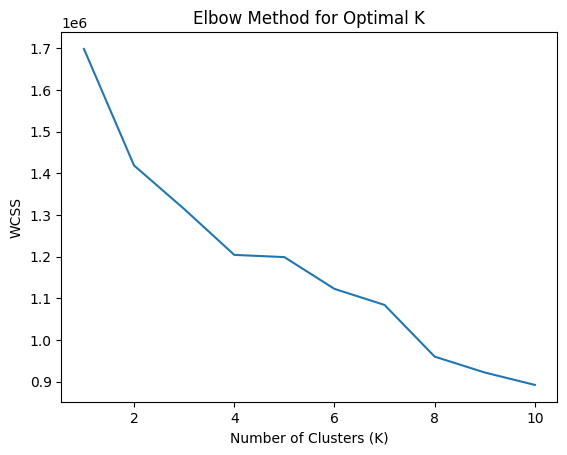

In [ ]:
# If there are still NaNs, reapply imputation
imputer = SimpleImputer(strategy='mean')  # You can also use 'median' or 'most_frequent'
normalized_data = imputer.fit_transform(normalized_data)
normalized_data2=normalized_data
# Check again for missing values
print(pd.isnull(normalized_data).sum())

wcss = []  # List to store WCSS (within-cluster sum of squares) for different K values

for k in range(1, 11):  # Try K values from 1 to 10
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(normalized_data)
    wcss.append(kmeans.inertia_)  # inertia_ gives the WCSS for KMeans

# Plot the Elbow Graph
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.show()


In [ ]:
# Impute missing values with mean
imputer = SimpleImputer(strategy='mean')
normalized_data_imputed = imputer.fit_transform(normalized_data)

# Check if imputation was successful (no NaNs left)
print(pd.isnull(normalized_data_imputed).sum())  # Should be 0 if no NaNs


0


In [20]:
normalized_data_imputed

array([[-6.47370588e-01, -8.17534112e-01, -1.20688039e+00, ...,
         2.13997705e-01, -1.06403534e-16,  0.00000000e+00],
       [ 5.30030908e-03,  1.34996086e+00, -1.19082643e+00, ...,
         7.87938727e-01, -1.06403534e-16,  0.00000000e+00],
       [-4.84202864e-01,  9.44578978e-01, -1.19307824e+00, ...,
         5.66267797e-02, -1.06403534e-16,  0.00000000e+00],
       ...,
       [ 3.31635758e-01,  1.11130654e+00,  1.37843378e+00, ...,
        -2.63850457e-01, -3.20634762e-01,  1.46327016e+00],
       [-4.84202864e-01,  1.22576385e+00,  1.38514306e+00, ...,
        -1.56940860e-01, -2.51501057e-01,  1.20206716e+00],
       [ 6.57971206e-01,  8.23640777e-01,  1.38214718e+00, ...,
         1.66605310e-01, -2.50583918e-01,  7.71229688e-02]],
      shape=(154400, 11))

The Elbow Method graph suggests that the optimal number of clusters appears to be around K=3 or K=4, where the curve starts to flatten. Typically, you choose the value of K where the decrease in WCSS slows down significantly, indicating that adding more clusters does not improve the clustering performance much.

In [ ]:
# Apply KMeans clustering (let's assume we are using K=4 based on the elbow method)
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(normalized_data_imputed)

# Silhouette Score
# silhouette_avg = silhouette_score(normalized_data_imputed, kmeans.labels_)
# print(f"Silhouette Score: {silhouette_avg}")

# Davies-Bouldin Index
dbi = davies_bouldin_score(normalized_data_imputed, kmeans.labels_)
print(f"Davies-Bouldin Index: {dbi}")


Davies-Bouldin Index: 1.392356373568419


In [ ]:
# # Step 1: Normalize the data (Z-score normalization using StandardScaler)
# scaler = StandardScaler()
# normalized_data = scaler.fit_transform(com[features])

# Step 2: Apply PCA to reduce dimensionality (e.g., reduce to 10 components)
pca = PCA(n_components=10)  # You can reduce to 5 or 10 components (adjust as needed)
reduced_data = pca.fit_transform(normalized_data_imputed)

# Check explained variance ratio to see how much variance is captured
print(f"Explained variance ratio by PCA components: {pca.explained_variance_ratio_}")



Explained variance ratio by PCA components: [0.2404839  0.12853451 0.12049539 0.09814216 0.09063205 0.08298056
 0.07833588 0.06198926 0.0567734  0.04163281]


In [23]:
# Check the shape of your dataset
print(normalized_data.shape)  # Should show (869, 154400)


(154400, 11)


In [ ]:
# Step 1: Apply KMeans clustering (with k=4)
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(normalized_data_imputed)

# Calculate the Davies-Bouldin Index
dbi = davies_bouldin_score(normalized_data_imputed, kmeans.labels_)
print(f"Davies-Bouldin Index for KMeans with K=4: {dbi}")


Davies-Bouldin Index for KMeans with K=4: 1.392356373568419


In [25]:
# Calculate the inertia (within-cluster sum of squares)
inertia = kmeans.inertia_
print(f"Inertia (within-cluster sum of squares) for KMeans with K=4: {inertia}")


Inertia (within-cluster sum of squares) for KMeans with K=4: 1204283.2136780564


In [ ]:
# Calculate the Calinski-Harabasz Index
ch_score = calinski_harabasz_score(normalized_data_imputed, kmeans.labels_)
print(f"Calinski-Harabasz Index for KMeans with K=4: {ch_score}")


Calinski-Harabasz Index for KMeans with K=4: 21115.091127024698


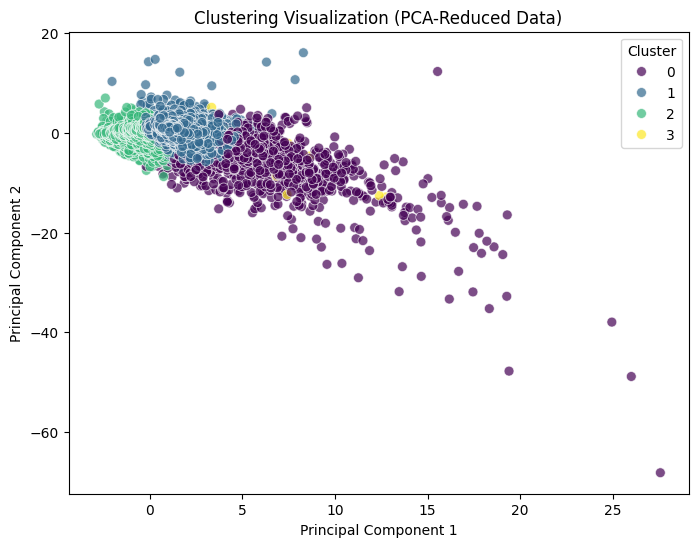

In [ ]:
# Step 1: Apply PCA to reduce the data to 2 components (for 2D visualization)
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(normalized_data_imputed)  # Or use `reduced_data` if PCA was already applied

# Step 2: Apply clustering to the reduced data (already done using KMeans or MiniBatchKMeans)
# Assuming you have kmeans.labels_ from the clustering

# Step 3: Create a scatter plot of the reduced data, color-coded by cluster label
plt.figure(figsize=(8, 6))
sns.scatterplot(x=reduced_data[:, 0], y=reduced_data[:, 1], hue=kmeans.labels_, palette='viridis', s=50, alpha=0.7)

# Add title and labels
plt.title('Clustering Visualization (PCA-Reduced Data)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()


In [28]:
# Assuming `kmeans.labels_` contains the cluster labels
combined_df['RegimeLabel'] = kmeans.labels_


In [29]:
# Calculate price returns
combined_df['PriceReturn'] = combined_df['Price'].pct_change()

# Calculate volatility (standard deviation of returns) for each regime
volatility = combined_df.groupby('RegimeLabel')['PriceReturn'].std()
print("Average Volatility for each regime:\n", volatility)


Average Volatility for each regime:
 RegimeLabel
0    0.000329
1    0.000147
2    0.000107
3    0.000130
Name: PriceReturn, dtype: float64


0 is Most volatile 2 is least volatile

In [30]:
# Calculate Bid-Ask Spread
combined_df['BidAskSpread'] = combined_df['AskPriceL20'] - combined_df['BidPriceL20']

# Calculate the Order Book Imbalance at Level 1
combined_df['OrderBookImbalance_L1'] = (combined_df['BidQtyL20'] - combined_df['AskQtyL20']) / (combined_df['BidQtyL20'] + combined_df['AskQtyL20'])

# Calculate average spread and liquidity for each regime
spread_liquidity = combined_df.groupby('RegimeLabel').agg({
    'BidAskSpread': 'mean',
    'OrderBookImbalance_L1': 'mean'
})

print("Average Spread and Liquidity for each regime:\n", spread_liquidity)


Average Spread and Liquidity for each regime:
              BidAskSpread  OrderBookImbalance_L1
RegimeLabel                                     
0                0.656711               0.016330
1                0.586400               0.025616
2                0.526251               0.037574
3                0.574570               0.091365


In [31]:
# Calculate mean price return for each regime
price_movement = combined_df.groupby('RegimeLabel')['PriceReturn'].mean()
print("Average Price Movement for each regime:\n", price_movement)


Average Price Movement for each regime:
 RegimeLabel
0    1.151301e-05
1   -5.775933e-07
2    8.515079e-07
3   -7.436358e-06
Name: PriceReturn, dtype: float64


In [32]:
# Define a mapping of cluster labels to descriptive names
regime_names = {
    0: "Trending & Liquidity & Stable",  # Regime 0
    1: "Stable & Liquid",               # Regime 1
    2: "Mean Reverting & Liquid & Stable",  # Regime 2
    3: "Volatile & Illiquid & Slight Downtrend"  # Regime 3
}

# Step 1: Assign descriptive regime labels to each row in the DataFrame
combined_df['MarketRegime'] = combined_df['RegimeLabel'].map(regime_names)

# Check the new DataFrame with the MarketRegime column
print(combined_df[['TimeRounded', 'RegimeLabel', 'MarketRegime']].head())


          TimeRounded  RegimeLabel                      MarketRegime
0 2025-03-14 00:00:02            2  Mean Reverting & Liquid & Stable
1 2025-03-14 00:00:03            2  Mean Reverting & Liquid & Stable
2 2025-03-14 00:00:04            2  Mean Reverting & Liquid & Stable
3 2025-03-14 00:00:05            2  Mean Reverting & Liquid & Stable
4 2025-03-14 00:00:08            2  Mean Reverting & Liquid & Stable


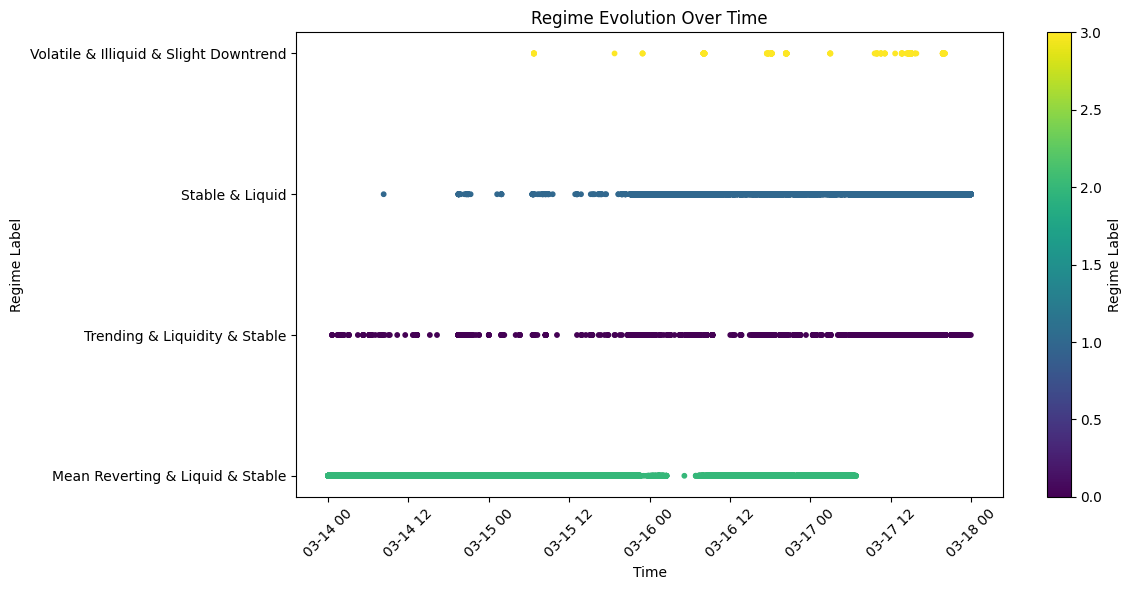

In [ ]:
# Plot Regime Evolution Over Time
plt.figure(figsize=(12, 6))
plt.scatter(combined_df['TimeRounded'], combined_df['MarketRegime'], c=combined_df['RegimeLabel'], cmap='viridis', s=10)
plt.title('Regime Evolution Over Time')
plt.xlabel('Time')
plt.ylabel('Regime Label')
plt.colorbar(label='Regime Label')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


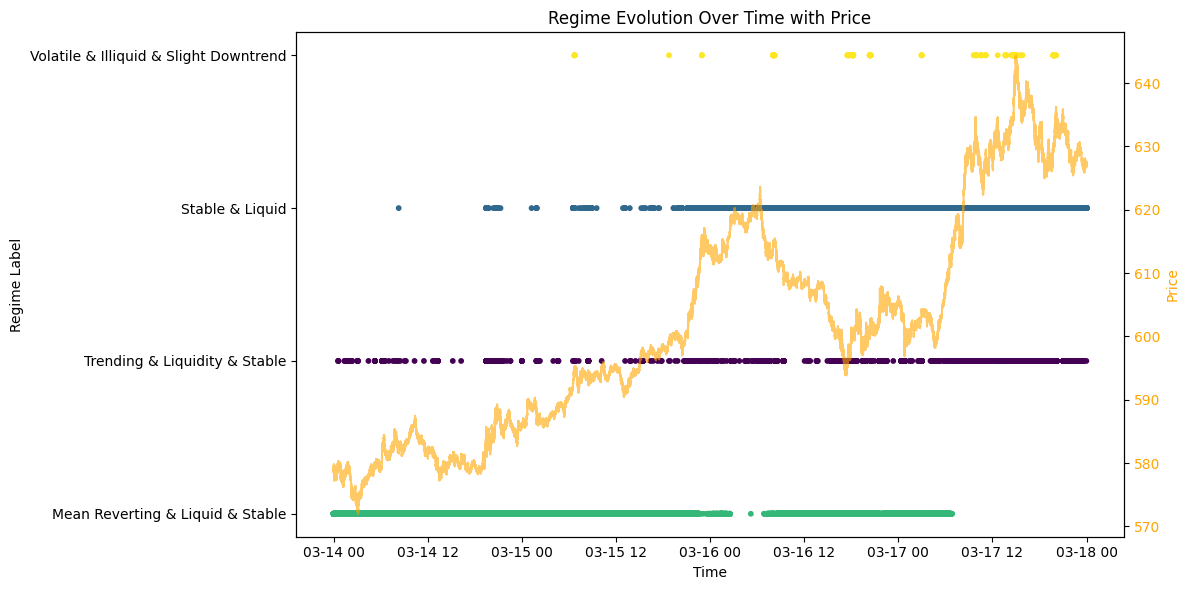

In [34]:
# Plot Regime Evolution and Price Chart
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot Regime Evolution
ax1.scatter(combined_df['TimeRounded'], combined_df['MarketRegime'], c=combined_df['RegimeLabel'], cmap='viridis', s=10)
ax1.set_xlabel('Time')
ax1.set_ylabel('Regime Label')
ax1.set_title('Regime Evolution Over Time with Price')

# Create another axis for plotting the price
ax2 = ax1.twinx()
ax2.plot(combined_df['TimeRounded'], combined_df['Price'], color='orange', alpha=0.6, label='Price')
ax2.set_ylabel('Price', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

fig.tight_layout()
plt.xticks(rotation=45)
plt.show()


In [39]:
# Step 1: Calculate Regime Transitions
# Shift the 'MarketRegime' column to get the previous regime
combined_df['Previous_Regime'] = combined_df['MarketRegime'].shift(1)

# Step 2: Create Transition Matrix (Count the transitions)
transition_matrix = pd.crosstab(combined_df['Previous_Regime'], combined_df['MarketRegime'], normalize='index')

# Print the transition matrix
print("Transition Matrix:\n", transition_matrix)


Transition Matrix:
 MarketRegime                            Mean Reverting & Liquid & Stable  \
Previous_Regime                                                            
Mean Reverting & Liquid & Stable                                0.966506   
Stable & Liquid                                                 0.056914   
Trending & Liquidity & Stable                                   0.053954   
Volatile & Illiquid & Slight Downtrend                          0.167421   

MarketRegime                            Stable & Liquid  \
Previous_Regime                                           
Mean Reverting & Liquid & Stable               0.030845   
Stable & Liquid                                0.929921   
Trending & Liquidity & Stable                  0.256467   
Volatile & Illiquid & Slight Downtrend         0.420814   

MarketRegime                            Trending & Liquidity & Stable  \
Previous_Regime                                                         
Mean Reverting & Liqui

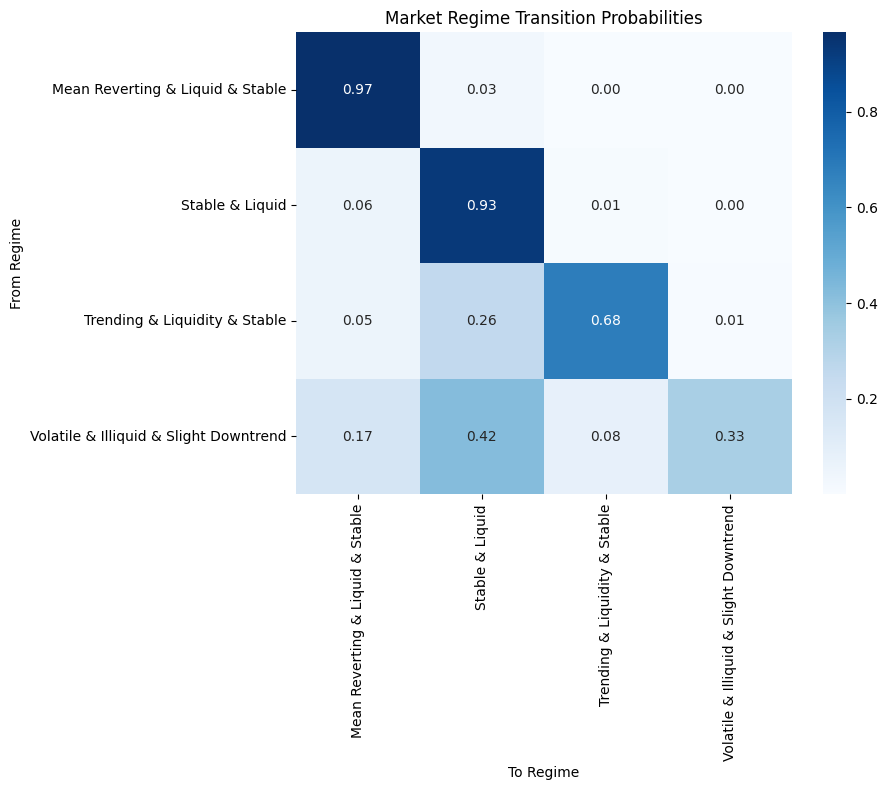

In [ ]:
# Step 3: Plot the Transition Matrix as a Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(transition_matrix, annot=True, cmap='Blues', cbar=True, fmt='.2f')
plt.title('Market Regime Transition Probabilities')
plt.xlabel('To Regime')
plt.ylabel('From Regime')
plt.show()


GMM

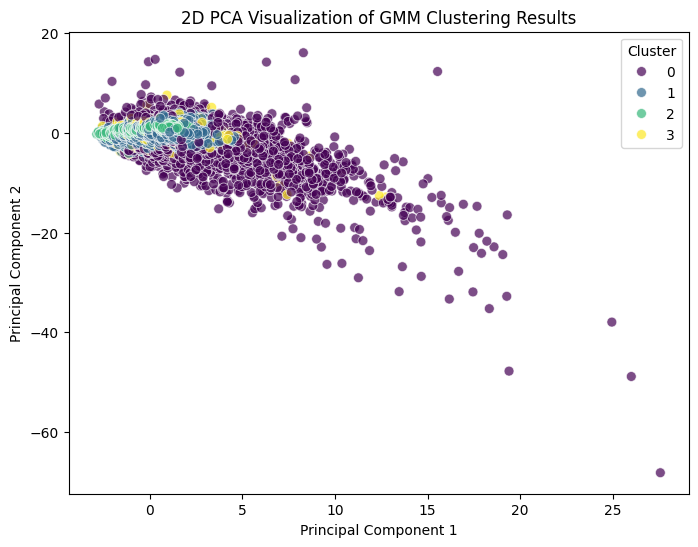

   Cluster_GMM  Cluster_Prob_0  Cluster_Prob_1  Cluster_Prob_2  Cluster_Prob_3
0            2    3.209113e-09        0.009255        0.990742        0.000003
1            1    2.281134e-06        0.988635        0.000002        0.011361
2            2    7.340081e-10        0.005966        0.994028        0.000007
3            2    1.070789e-08        0.011787        0.988196        0.000017
4            2    6.604308e-10        0.002491        0.997504        0.000004


In [ ]:
# Step 1: Apply GMM clustering
gmm = GaussianMixture(n_components=4, random_state=42)  # Assume we want 4 components (clusters)
combined_df['Cluster_GMM'] = gmm.fit_predict(normalized_data2)

# Step 2: Calculate the soft probabilities (responsibilities) for each data point
probs = gmm.predict_proba(normalized_data)
combined_df['Cluster_Prob_0'] = probs[:, 0]  # Probability of being in cluster 0
combined_df['Cluster_Prob_1'] = probs[:, 1]  # Probability of being in cluster 1
combined_df['Cluster_Prob_2'] = probs[:, 2]  # Probability of being in cluster 2
combined_df['Cluster_Prob_3'] = probs[:, 3]  # Probability of being in cluster 3

# Step 3: Visualize the clusters after GMM (using PCA for dimensionality reduction)
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster_GMM', data=combined_df, palette='viridis', s=50, alpha=0.7)
plt.title('2D PCA Visualization of GMM Clustering Results')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

# Step 4: Print the probabilities of belonging to each cluster
print(combined_df[['Cluster_GMM', 'Cluster_Prob_0', 'Cluster_Prob_1', 'Cluster_Prob_2', 'Cluster_Prob_3']].head())



In [ ]:
# Step 1: Apply GMM clustering
gmm = GaussianMixture(n_components=4, random_state=42)  # Assume 4 components (clusters)
combined_df['Cluster_GMM'] = gmm.fit_predict(normalized_data)

# Step 2: Calculate the soft probabilities (responsibilities) for each data point
probs = gmm.predict_proba(normalized_data)
combined_df['Cluster_Prob_0'] = probs[:, 0]  # Probability of being in cluster 0
combined_df['Cluster_Prob_1'] = probs[:, 1]  # Probability of being in cluster 1
combined_df['Cluster_Prob_2'] = probs[:, 2]  # Probability of being in cluster 2
combined_df['Cluster_Prob_3'] = probs[:, 3]  # Probability of being in cluster 3

# Step 3: Calculate the characteristics for each regime
# Average Volatility (Standard deviation of price returns)
combined_df['PriceReturn'] = combined_df['Price'].pct_change()
volatility = combined_df.groupby('Cluster_GMM')['PriceReturn'].std()

# Average Bid-Ask Spread
combined_df['BidAskSpread'] = combined_df['AskPriceL20'] - combined_df['BidPriceL20']
spread = combined_df.groupby('Cluster_GMM')['BidAskSpread'].mean()

# Order Book Imbalance
combined_df['OrderBookImbalance_L1'] = (combined_df['BidQtyL20'] - combined_df['AskQtyL20']) / (combined_df['BidQtyL20'] + combined_df['AskQtyL20'])
imbalance = combined_df.groupby('Cluster_GMM')['OrderBookImbalance_L1'].mean()

# Average Price Movement Directionality (mean of PriceReturn)
price_movement = combined_df.groupby('Cluster_GMM')['PriceReturn'].mean()

# Combine results into a summary table
regime_summary = pd.DataFrame({
    'Volatility': volatility,
    'Spread': spread,
    'OrderBookImbalance': imbalance,
    'PriceMovement': price_movement
})

print("Market Regime Summary:\n", regime_summary)

Market Regime Summary:
              Volatility    Spread  OrderBookImbalance  PriceMovement
Cluster_GMM                                                         
0              0.000303  0.643692           -0.048346   5.885996e-07
1              0.000145  0.569813           -0.021374   6.589289e-06
2              0.000093  0.530148            0.060231   3.455370e-07
3              0.000166  0.571590            0.147628  -3.754568e-05


In [37]:
# Mapping of cluster labels to descriptive names
regime_names = {
    0: "Trending & Liquidity & Volatile",  # Cluster 0
    1: "Stable & Liquid",                  # Cluster 1
    2: "Mean Reverting & Illiquid & Stable",  # Cluster 2
    3: "Volatile & Illiquid & Downtrend"   # Cluster 3
}

# Assign descriptive market regime labels to each data point
combined_df['MarketRegimeGMM'] = combined_df['Cluster_GMM'].map(regime_names)

# Display the first few rows of the dataframe with the new regime labels
print(combined_df[['TimeRounded', 'Cluster_GMM', 'MarketRegimeGMM']].head())


          TimeRounded  Cluster_GMM                     MarketRegimeGMM
0 2025-03-14 00:00:02            2  Mean Reverting & Illiquid & Stable
1 2025-03-14 00:00:03            1                     Stable & Liquid
2 2025-03-14 00:00:04            2  Mean Reverting & Illiquid & Stable
3 2025-03-14 00:00:05            2  Mean Reverting & Illiquid & Stable
4 2025-03-14 00:00:08            2  Mean Reverting & Illiquid & Stable


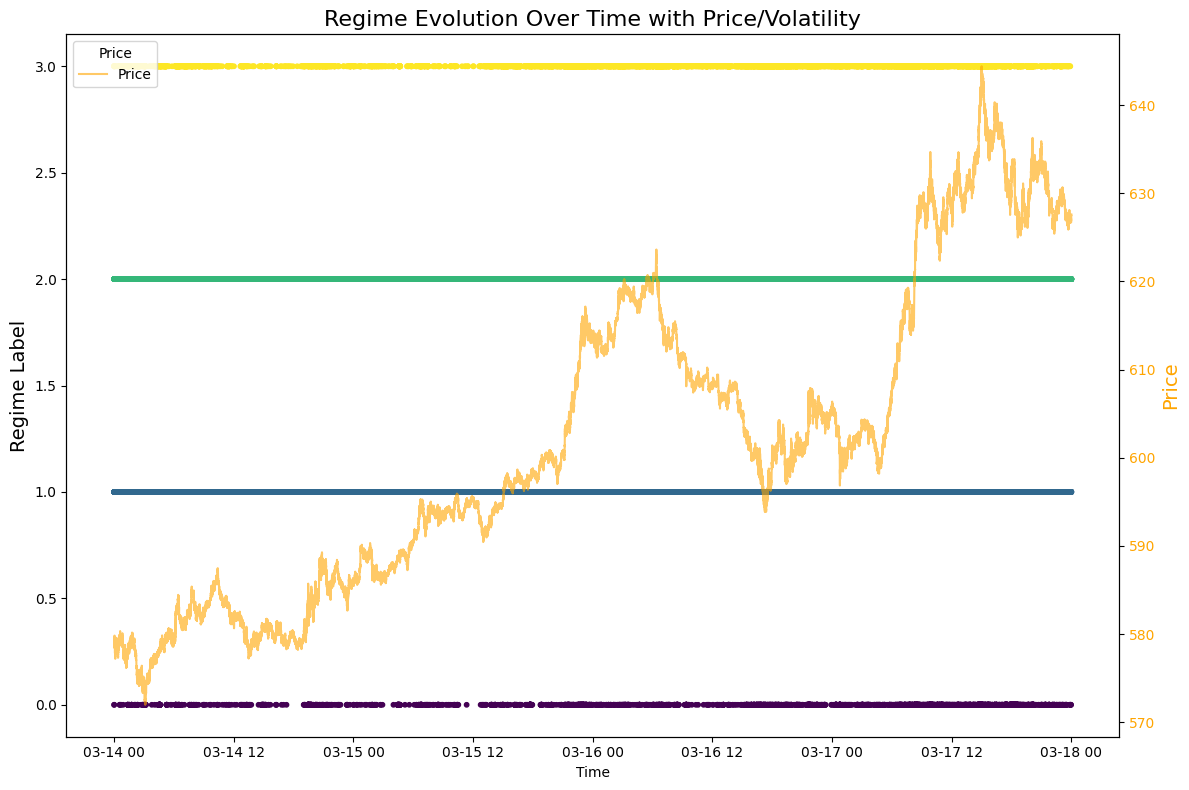

In [ ]:
# Step 1: Plot Regime Evolution Over Time
fig, ax1 = plt.subplots(figsize=(12, 8))

# Plot regime evolution on the primary y-axis
ax1.scatter(combined_df['TimeRounded'], combined_df['Cluster_GMM'], c=combined_df['Cluster_GMM'], cmap='viridis', s=10)
ax1.set_xlabel('Time')
ax1.set_ylabel('Regime Label', fontsize=14)
ax1.set_title('Regime Evolution Over Time with Price/Volatility', fontsize=16)

# Step 2: Create a secondary axis for the price or volatility plot
ax2 = ax1.twinx()  # Share the x-axis with ax1
ax2.plot(combined_df['TimeRounded'], combined_df['Price'], color='orange', alpha=0.6, label='Price')  # You can use 'Price' or 'Volatility' column here
ax2.set_ylabel('Price', color='orange', fontsize=14)  # y-axis label for price
ax2.tick_params(axis='y', labelcolor='orange')

# Step 3: Customize plot
fig.tight_layout()
plt.xticks(rotation=45)
plt.legend(title='Price', loc='upper left')

# Show the plot
plt.show()
